In [ ]:
#  1. Data Exploration
#  Load the dataset using pandas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/adaboost_dataset.csv")
print(df.to_string())

     Age  Salary  Account_Balance  Tenure_Years  Churn
0     56   78053            49747             5      0
1     69   41959            22606             3      0
2     46   25530            22699             7      0
3     32   23748             1876             2      1
4     60   33545            33093             9      0
5     25   86199             5142             1      0
6     38   54766            16202             6      0
7     56   93530            40734             7      0
8     36   81087             8079             8      0
9     40   88840             8987             9      0
10    28   74384            40567             2      0
11    28   71005            29940             2      0
12    41   66576            38233             5      0
13    53   59353            18019             5      0
14    57   82003            47185             6      1
15    41   72733            19077             3      0
16    20   85318            27258             8      0
17    39  

In [ ]:
#  Display basic info (.info())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              200 non-null    int64
 1   Salary           200 non-null    int64
 2   Account_Balance  200 non-null    int64
 3   Tenure_Years     200 non-null    int64
 4   Churn            200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
#  summary stats (.describe())

df.describe()

,Age,Salary,Account_Balance,Tenure_Years,Churn
count,200.00000,200.000000,200.000000,200.000000,200.000000
mean,43.42500,58856.870000,24755.435000,4.725000,0.320000
std,14.94191,23306.295335,13903.405255,2.555785,0.467647
min,18.00000,20301.000000,1412.000000,1.000000,0.000000
25%,31.00000,38459.250000,12788.000000,2.000000,0.000000
50%,43.50000,60791.000000,24562.000000,5.000000,0.000000
75%,56.00000,76704.500000,36260.250000,7.000000,1.000000
max,69.00000,99909.000000,49816.000000,9.000000,1.000000


In [ ]:
#  check for missing values.

df.isnull().sum()

,0
Age,0
Salary,0
Account_Balance,0
Tenure_Years,0
Churn,0


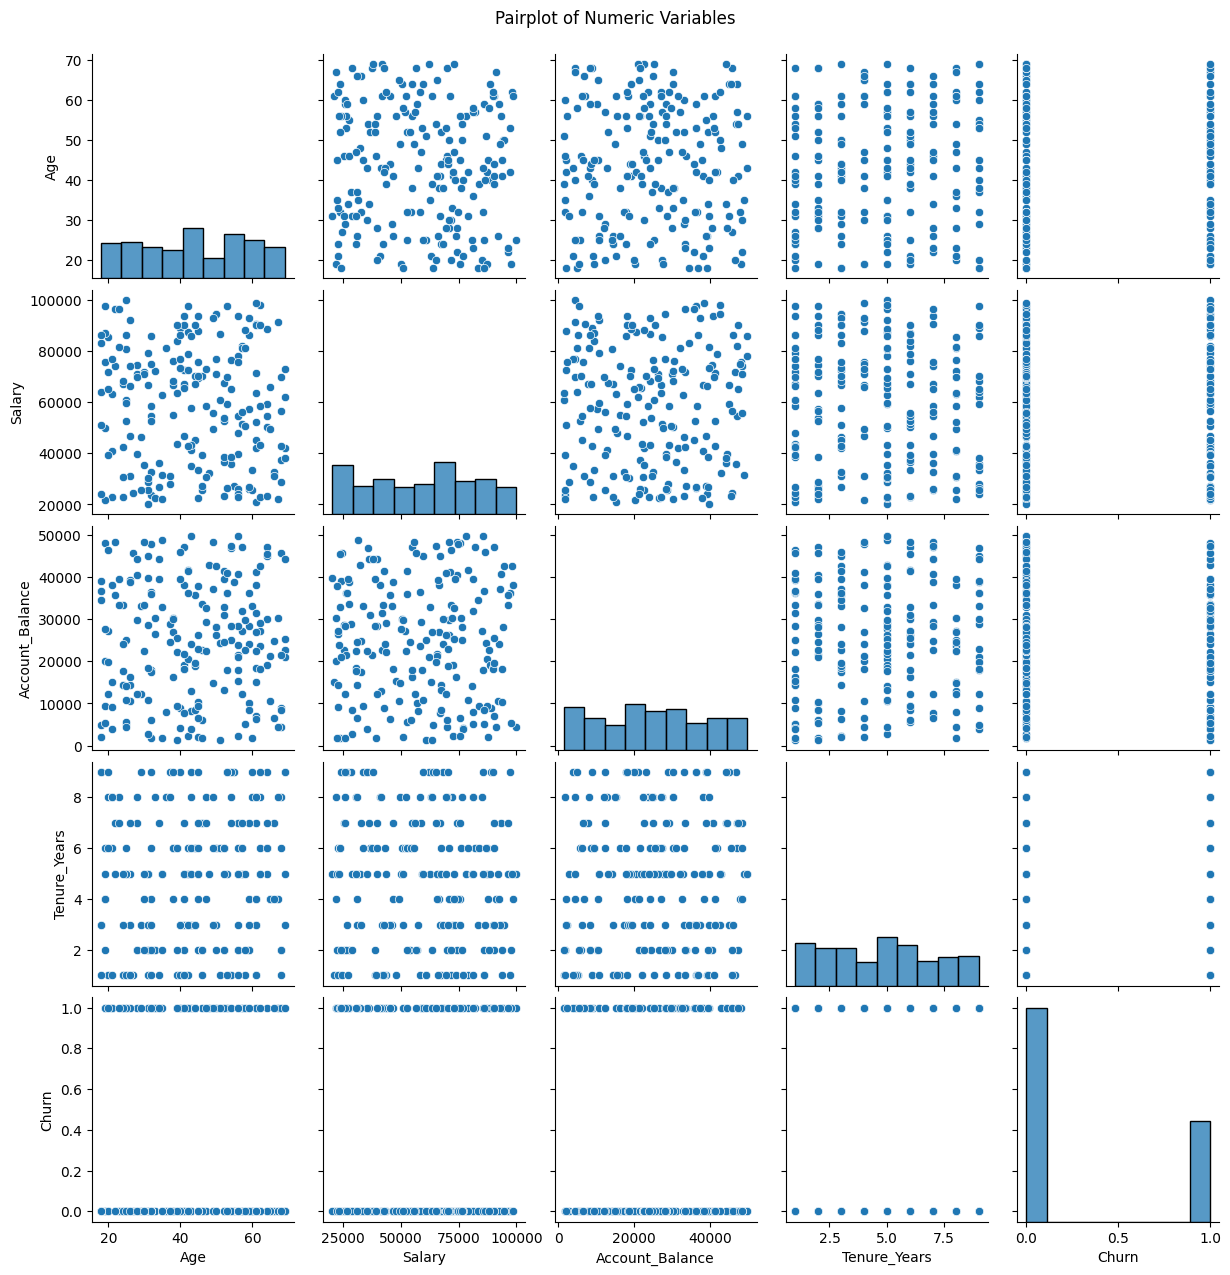

In [ ]:
#  Visualize distributions and relationships (pairplot)

sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

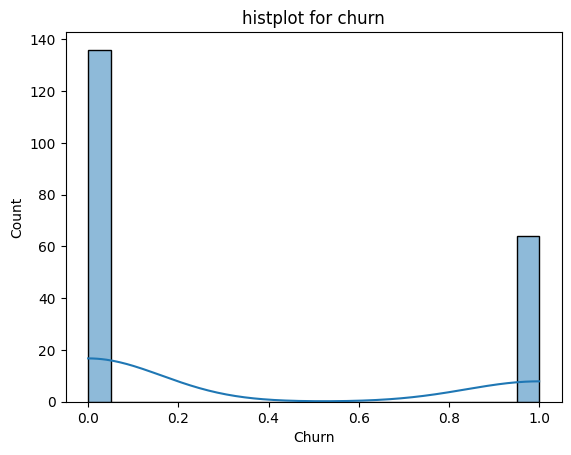

In [ ]:
#  histplot for churn

sns.histplot(data=df, x='Churn', bins=20, kde=True)
plt.title("histplot for churn")
plt.show()

In [ ]:
#  2. Preprocessing
#  Separate features (Age, Salary, Account_Balance, Tenure_Years) and target (Churn).

from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.drop('Churn', axis=1)
y = df['Churn']
y = y.astype(int)


In [ ]:
#  Perform scaling (e.g., StandardScaler) if needed

numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()

# Scale only the numerical features in X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
#  3. Train/Test Split
#  Use train_test_split with 80/20 split and random_state=42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  4. Build and Train AdaBoost Model
#  Use AdaBoostClassifier from sklearn.ensemble.
#  Use DecisionTreeClassifier as the base estimator with max_depth=1.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=1)

In [ ]:
#  Train on training data.

adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42) # Changed base_estimator to estimator
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
#  5. Model Evaluation
#  Predict on test set.

y_pred = adaboost_model.predict(X_test)

In [ ]:
#  Evaluate using:
#  Accuracy Score
#  Confusion Matrix
#  Classification Report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.5
Confusion Matrix:
[[20  7]
 [13  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        27
           1       0.00      0.00      0.00        13

    accuracy                           0.50        40
   macro avg       0.30      0.37      0.33        40
weighted avg       0.41      0.50      0.45        40

